In [122]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [123]:
url = r"C:\Users\ragha\Desktop\My goal\iris.data"
names = ['sepal_length','sepal_width','petal_length','petal_width', 'class']
data = pd.read_csv(url, names= names)

In [124]:
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [125]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


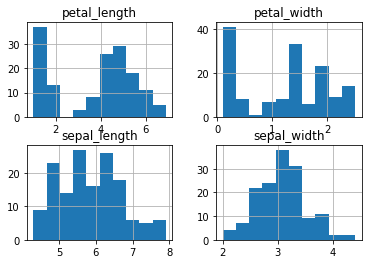

150


In [126]:
data.hist()
plt.show()
print(len(data))

In [127]:
# train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])
# print(train.shape)
# print(validate.shape)
# print(test.shape)

In [129]:
array = data.values
np.random.shuffle(array)
train , test = array[:int(len(array)*0.75), :], array[int(len(array)*0.75):,:]
train, val = array[:int(len(array)*0.7), :], array[int(len(array)*0.7):, :]
# train, test, val = array[:75,:], array[75:113,:], array[113:,:]
X_train, y_train = train[:,0:4], train[:,4]
X_test, y_test = test[:,0:4], test[:,4]
X_val, y_val = val[:,0:4], val[:,4]

In [130]:
neighbors = [1,3,5]
train_accuracy = [ ]
val_accuracy =   [ ]
test_accuracy =  [ ]

for k in neighbors:
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    t = knn.score(X_train, y_train)
    train_accuracy.append(t)
    
    #Compute accuracy on the test set
    v = knn.score(X_val, y_val) 
    val_accuracy.append(t)
    
    #Compute accuracy on the test set
    te = knn.score(X_test, y_test)
    test_accuracy.append(te)   

In [131]:
print(train_accuracy)
print(val_accuracy)
print(test_accuracy)

[1.0, 0.9619047619047619, 0.9619047619047619]
[1.0, 0.9619047619047619, 0.9619047619047619]
[0.9736842105263158, 0.9210526315789473, 0.9210526315789473]


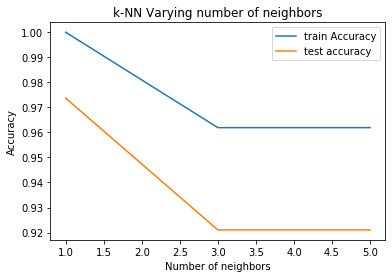

In [133]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='train Accuracy')
plt.plot(neighbors, test_accuracy, label='test accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### We can observe above that we get maximum testing accuracy for k=1. So lets create a KNeighborsClassifier with number of neighbors as 1.

In [135]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9736842105263158

In [136]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [137]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 15]], dtype=int64)

In [138]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,10,0,0,10
Iris-versicolor,0,12,0,12
Iris-virginica,0,1,15,16
All,10,13,15,38
